In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
log_df = pd.read_csv('LogDf.csv')
session_df = pd.read_csv('SessionDf.csv')
log_data = log_df.to_dict(orient='dict')
session_data = session_df.to_dict(orient='dict')
spike_times = np.load('spktimes.npy', allow_pickle = True) 
# dig_spikes = np.load('./data/spks.npy', allow_pickle = True)

NUM_NEURONS = spike_times.shape[0]

In [3]:
def remove_nans(arr):
    return [x for x in arr if not math.isnan(x)]

for cell in range(NUM_NEURONS):
    spike_times[cell] = remove_nans(spike_times[cell])

In [4]:
print(log_data.keys())
print(session_data.keys())

dict_keys(['t', 'name', 'var', 'value'])
dict_keys(['chosen_side', 'chosen_interval', 'correct_side', 'interval_category', 'has_choice', 'this_interval', 'outcome', 'init_port', 'choice_rt', 't_on', 't_off', 't'])


In [5]:
stim_onset_t = []
stim_offset_t = []
trial_entry_t = []
choice_state = []

for index in range(len(log_data['t'])):

    time = log_data['t'][index]
    name = log_data['name'][index]

    if name == 'STIM_ONSET_EVENT':
        stim_onset_t.append(time)
    elif name == 'STIM_OFFSET_EVENT':
        stim_offset_t.append(time)
    elif name == 'TRIAL_ENTRY_EVENT':
        trial_entry_t.append(time)
    elif name == 'CHOICE_STATE':
        choice_state.append(time)

stim_onset_t = remove_nans(stim_onset_t)
stim_offset_t = remove_nans(stim_offset_t)
trial_entry_t = remove_nans(trial_entry_t)
choice_state = remove_nans(choice_state)

In [ ]:

print(len(stim_offset_t))

0


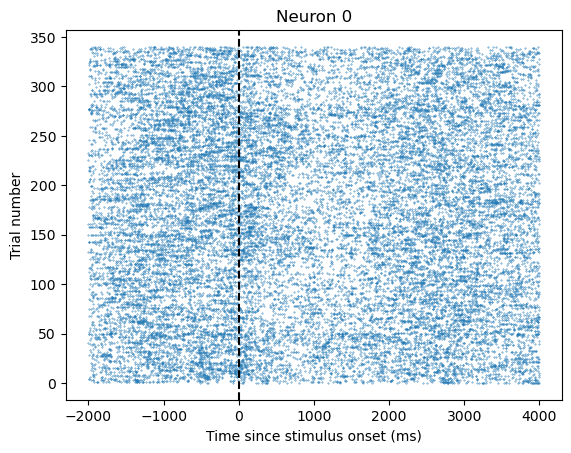

1


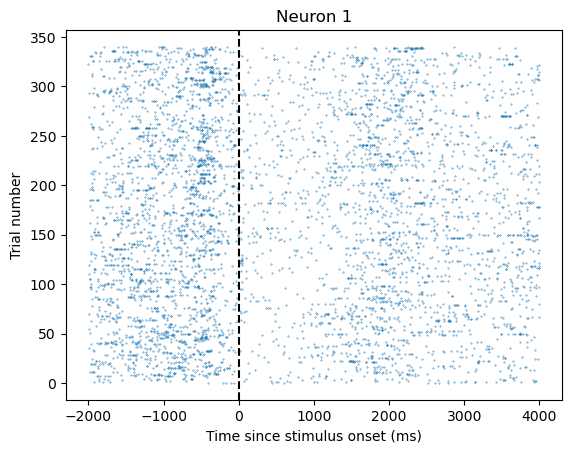

2


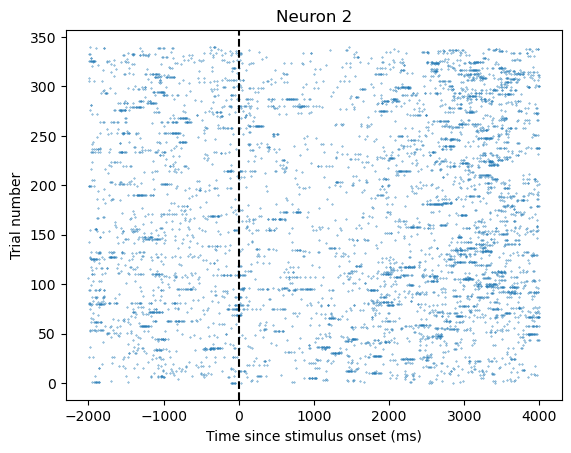

3


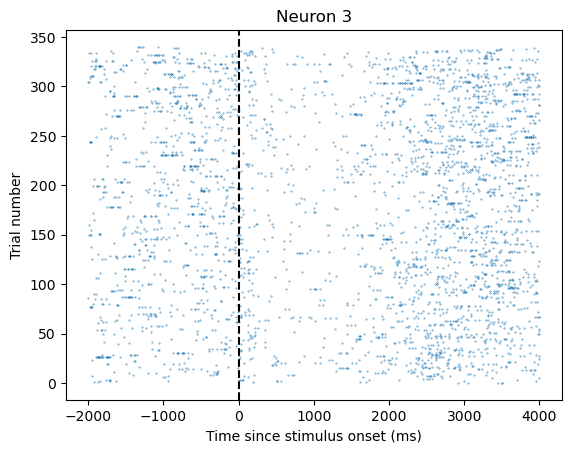

4


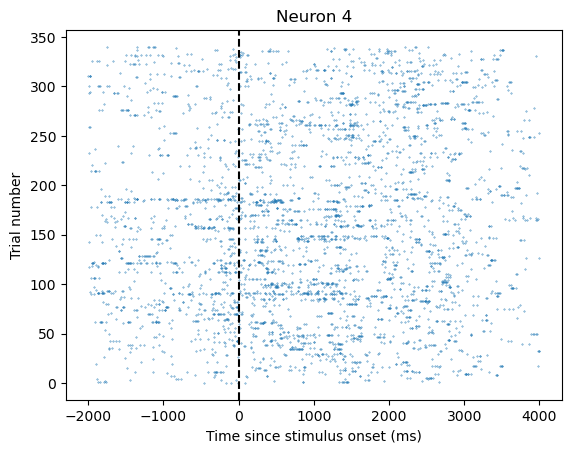

5


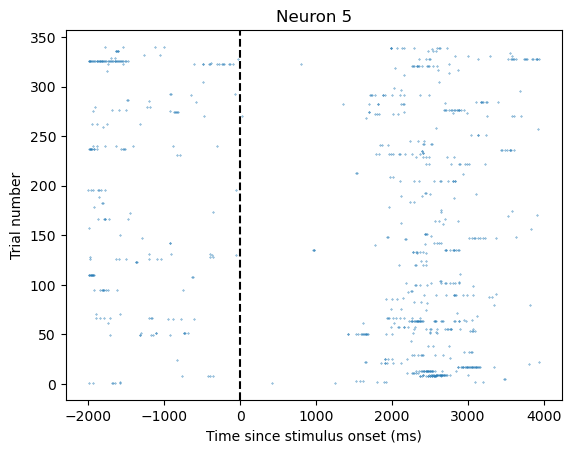

6


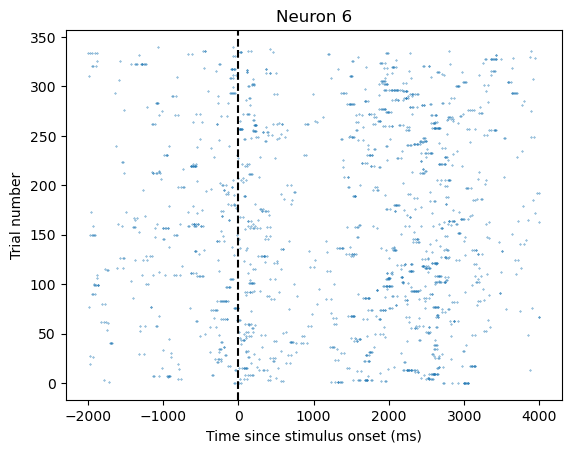

7


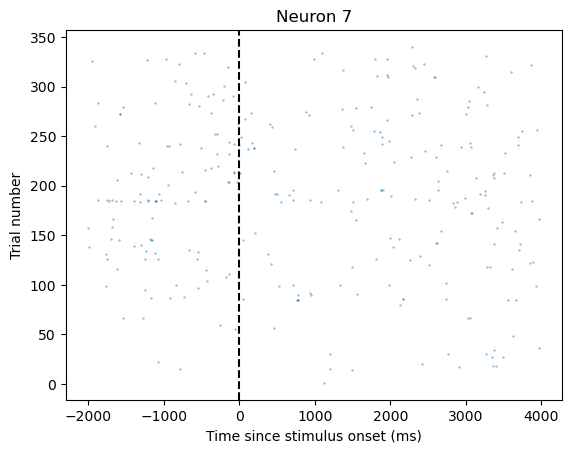

8


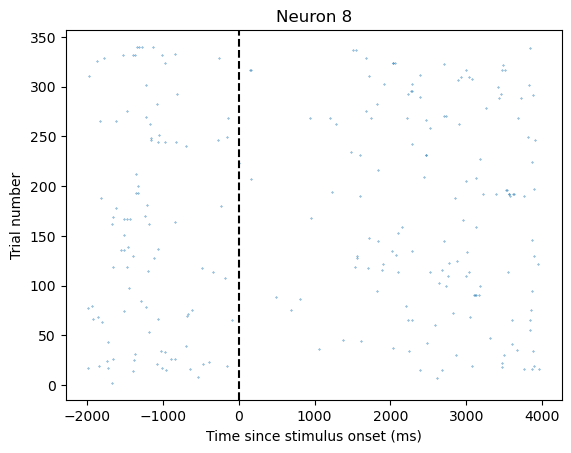

9


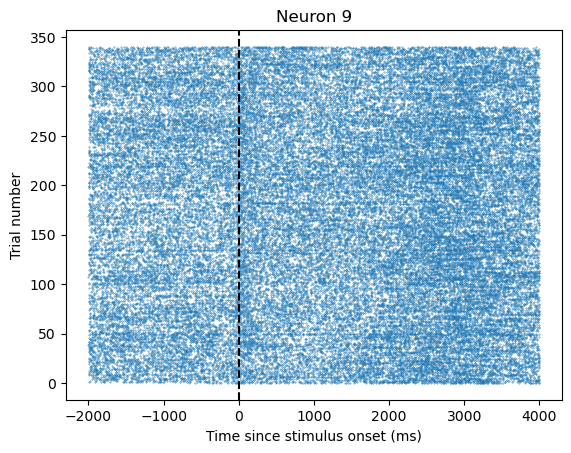

10


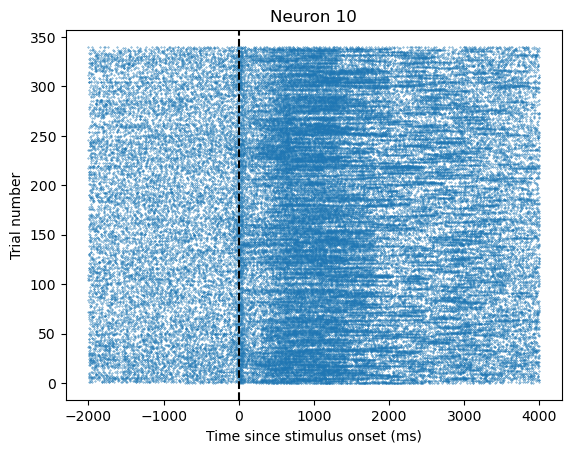

11


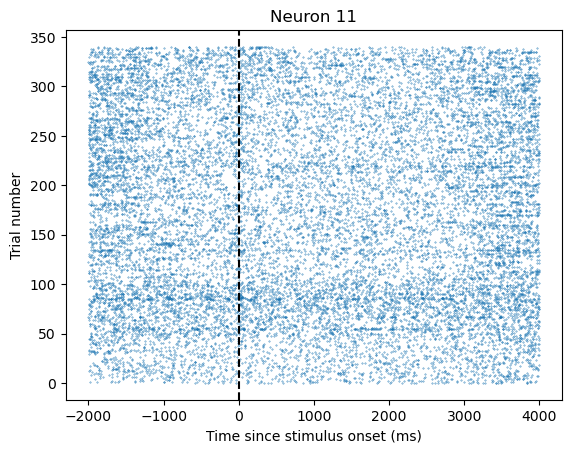

12


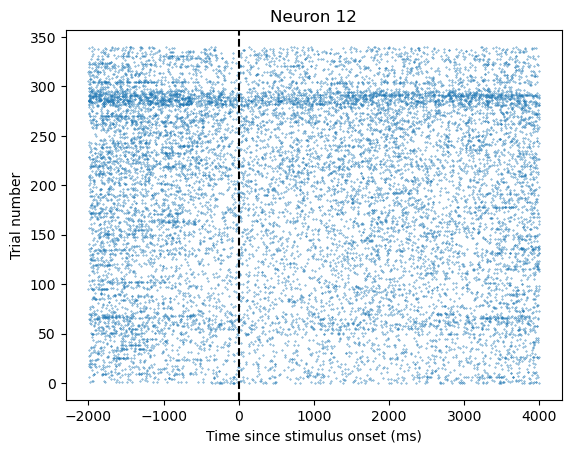

13


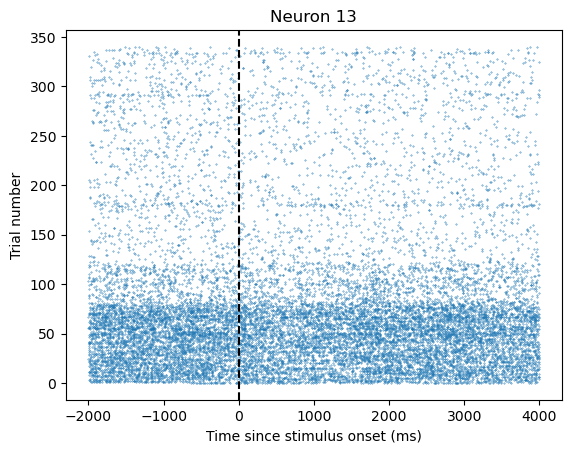

14


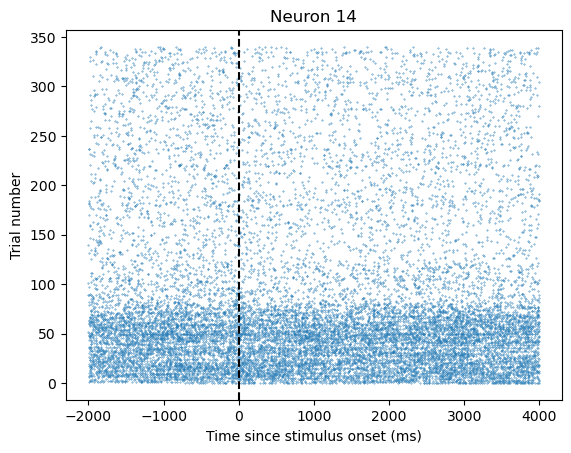

15


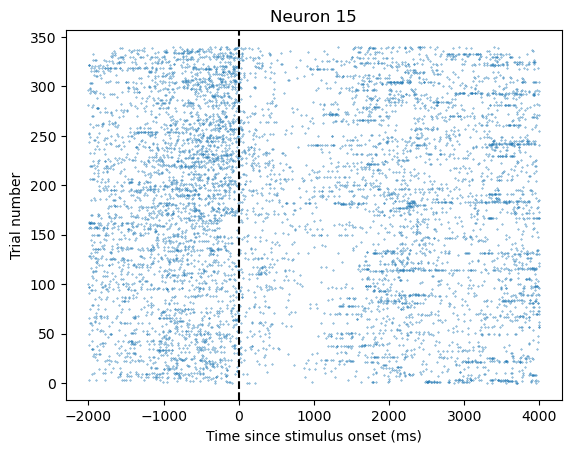

16


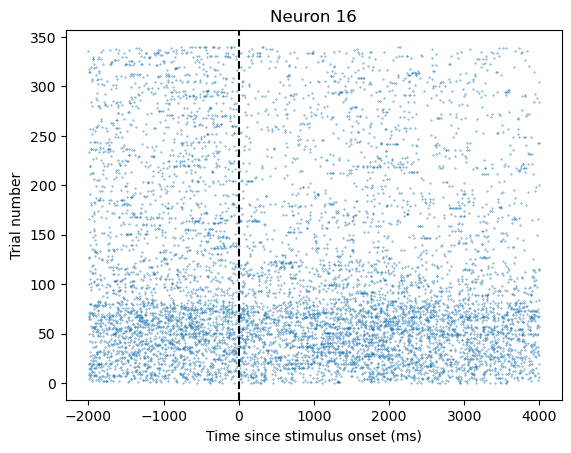

17


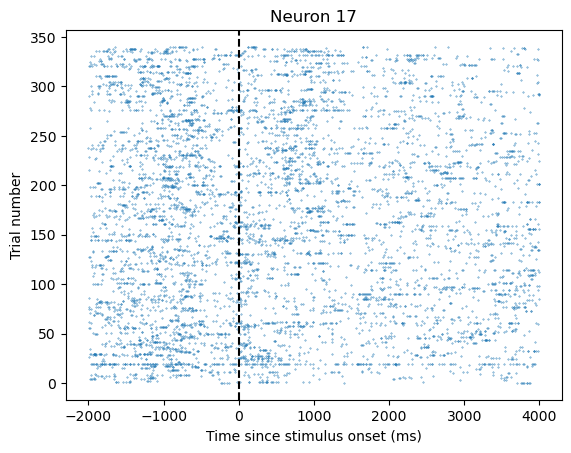

18


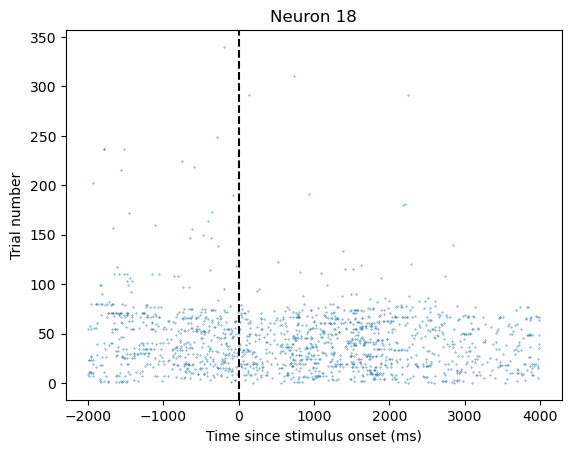

: 

In [6]:
window = [-2000,4000]
n_trials = len(stim_onset_t)

for neuron in range(NUM_NEURONS):
    all_spikes_neuron = []
    all_trial_nums = []
    
    for trial in range(n_trials):
        aligned_spikes = np.array(spike_times[neuron]) - stim_onset_t[trial]
        trial_index_spikes = np.intersect1d(np.where(aligned_spikes<window[1])[0],np.where(aligned_spikes>window[0])[0])
        all_spikes_neuron.extend(aligned_spikes[trial_index_spikes])
        n_spikes = len(trial_index_spikes)
        all_trial_nums.extend([trial]*n_spikes)

    plt.figure()
    plt.scatter(all_spikes_neuron, all_trial_nums,s=0.1)
    plt.ylabel("Trial number")
    plt.xlabel("Time since stimulus onset (ms)")
    plt.title(f"Neuron {neuron}")
    plt.axvline(x=0,color="k",ls="--")
    plt.show()

